In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mne import read_epochs
from sklearn.preprocessing import LabelEncoder
from jupyterthemes.stylefx import set_nb_theme
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
set_nb_theme('gruvboxd')

In [2]:
epochs = read_epochs('nirs_epo.fif')

Reading C:\Users\Alberto\Documents\BCI\data\ah\nirs_epo.fif ...
    Found the data of interest:
        t =   -4992.00 ...   19968.00 ms
        0 CTF compensation matrices available
Not setting metadata
70 matching events found
No baseline correction applied
0 projection items activated


In [3]:
epochs['rest','left']

Number of events,24
Events,left: 12rest: 12
Time range,-4.992 – 19.968 sec
Baseline,-3.000 – 0.000 sec


In [4]:
data = epochs['left','rest'].copy().crop(5,12).to_data_frame()


In [5]:
data

,time,condition,epoch,S1_D1 hbo,S1_D1 hbr,S1_D3 hbo,S1_D3 hbr,S2_D2 hbo,S2_D2 hbr,S2_D3 hbo,...,S7_D3 hbo,S7_D3 hbr,S7_D4 hbo,S7_D4 hbr,S8_D1 hbo,S8_D1 hbr,S8_D3 hbo,S8_D3 hbr,S8_D4 hbo,S8_D4 hbr
0,4.992,rest,4,-10.890520,-4.627840,98.136254,-243.703878,-90.301306,123.796635,49.676513,...,9.755177,1.388653,0.421051,-0.620589,-227.905926,269.117765,-64.204702,101.788268,101.782120,-37.057966
1,5.120,rest,4,-11.265997,-5.055167,56.492456,-207.684032,-75.535609,100.790552,23.695980,...,3.808283,8.294076,0.971218,-0.694284,-169.523832,273.900456,-45.042852,86.250933,-117.107964,158.639814
2,5.248,rest,4,-11.133136,-5.401634,39.292005,-187.812213,-56.012548,72.635041,-20.295700,...,-2.704773,15.069636,1.773434,-0.777929,-81.733931,225.485928,-19.671756,63.329200,-334.228593,342.371262
3,5.376,rest,4,-10.491947,-5.649697,43.828448,-181.452211,-33.841225,42.769268,-73.584117,...,-9.013794,20.939919,2.792551,-0.867656,20.193911,135.428243,7.920883,36.169404,-521.244656,490.903505
4,5.504,rest,4,-9.403556,-5.790018,62.909334,-183.004755,-11.733012,15.126548,-125.519829,...,-14.242918,25.125421,3.960077,-0.958066,116.044394,24.004368,33.628065,8.274617,-656.355172,588.303665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,11.520,rest,79,-2.113659,11.981729,-93.285053,86.931170,-38.122776,13.098187,-104.872757,...,-18.469702,-5.670528,-25.701116,2.561713,473.658700,-222.916220,45.276553,-56.856970,-35.107554,6.596159
1340,11.648,rest,79,0.157267,12.267461,-111.040092,85.080566,-37.012967,7.522048,-74.898606,...,-16.741509,-9.595696,-24.423889,2.500617,421.322417,-183.928467,10.042491,-25.177827,-157.138697,80.345613
1341,11.776,rest,79,2.230345,12.662256,-87.733912,53.772103,-34.578297,3.190475,-37.922357,...,-16.480632,-11.621904,-23.526269,2.474378,345.835957,-139.871103,-28.077262,6.786338,-234.566134,124.785613
1342,11.904,rest,79,3.822801,13.199350,-17.123200,-12.652280,-31.717878,1.036430,1.726721,...,-18.052022,-11.357368,-23.305129,2.505773,253.998238,-93.384078,-66.024368,36.950318,-252.237980,128.610453


In [6]:
hbo_cols = [col for col in data.columns if 'hbo' in col ]

In [7]:
mean = data.groupby(['epoch','condition'])[hbo_cols].mad()
maxi = data.groupby('epoch')[hbo_cols].max()
mini = data.groupby('epoch')[hbo_cols].min()
skw = data.groupby('epoch')[hbo_cols].skew()

C:\Users\Alberto\AppData\Local\Temp\ipykernel_14708\947805271.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mean = data.groupby(['epoch','condition'])[hbo_cols].mad()
C:\Users\Alberto\AppData\Local\Temp\ipykernel_14708\947805271.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mean = data.groupby(['epoch','condition'])[hbo_cols].mad()
C:\Users\Alberto\AppData\Local\Temp\ipykernel_14708\947805271.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mean = data.groupby(['epoch','condition'])[hbo_cols].mad()
C:\Users\Alberto\AppData\Local\Temp\ipykernel_14708\947805271.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in

In [8]:
mean

,,S1_D1 hbo,S1_D3 hbo,S2_D2 hbo,S2_D3 hbo,S2_D4 hbo,S3_D1 hbo,S3_D2 hbo,S3_D3 hbo,S4_D2 hbo,S4_D4 hbo,S5_D1 hbo,S5_D3 hbo,S6_D2 hbo,S6_D4 hbo,S7_D2 hbo,S7_D3 hbo,S7_D4 hbo,S8_D1 hbo,S8_D3 hbo,S8_D4 hbo
epoch,condition,,,,,,,,,,,,,,,,,,,,
4,rest,6.681084,200.262766,46.788562,160.088838,412.706115,6.295146,515.272678,14.344875,124.261197,299.224192,4.318788,16.583394,545.769827,37.866775,125.166176,15.221215,5.899727,303.961715,72.240015,264.625203
5,left,4.942888,235.187230,34.233257,157.679137,309.843119,5.954779,350.400397,15.924159,115.612507,249.245289,4.142741,20.330149,417.978348,41.961979,70.214091,21.789517,6.151698,374.772308,109.869177,204.610361
6,rest,5.387014,347.178146,48.087078,150.892368,342.398688,6.440974,370.434447,12.490506,108.807583,303.646282,4.433594,11.873901,455.341626,46.289861,86.294461,17.898723,6.057960,252.236145,59.220688,295.092567
7,left,3.483814,191.715758,28.386044,107.298803,117.381215,3.970988,286.665528,14.484585,135.516953,242.065215,2.760870,15.663809,358.182255,63.109057,129.223890,19.583025,4.043924,324.476312,72.703705,266.905568
12,rest,6.310937,196.046726,38.711807,68.857186,332.327703,9.234816,400.307612,16.804784,104.158560,518.510356,6.416026,23.648158,285.276775,40.326988,87.609851,20.018666,9.254231,264.497900,50.652045,256.396799
17,left,6.584493,409.542916,46.438096,91.761828,192.604855,8.147660,374.662918,15.943804,104.152080,314.666074,5.618521,21.099617,433.326297,28.748111,105.432742,19.727895,7.728112,349.312294,120.562213,217.514920
18,left,3.086176,289.248650,44.171236,108.932765,262.851199,3.452444,260.420523,10.466270,107.953649,423.381880,2.457956,23.442927,483.602039,29.270891,104.189494,10.137997,4.299711,403.588594,51.364498,238.357659
20,rest,7.982226,311.864282,34.966805,150.476285,231.262619,13.038246,301.554544,30.635528,89.977758,342.124001,9.075199,25.415691,385.214070,65.640871,99.288847,29.483327,13.266784,356.549436,69.774837,278.750175
24,rest,4.749712,205.391843,54.604217,142.436600,281.857071,6.118652,345.042254,15.580283,81.978981,356.651205,4.240655,15.359804,353.158844,67.643128,187.965709,9.508986,6.024649,269.595522,38.889222,275.408788


In [9]:
grouped = mean.groupby(['epoch','condition']).count()

In [10]:
grouped.index.values
y = [i[1] for i in grouped.index.values]

In [11]:
grouped.index.values

array([(4, 'rest'), (5, 'left'), (6, 'rest'), (7, 'left'), (12, 'rest'),
       (17, 'left'), (18, 'left'), (20, 'rest'), (24, 'rest'),
       (27, 'rest'), (33, 'left'), (37, 'left'), (46, 'rest'),
       (48, 'left'), (49, 'rest'), (52, 'left'), (53, 'rest'),
       (57, 'left'), (62, 'rest'), (69, 'left'), (70, 'rest'),
       (74, 'left'), (78, 'left'), (79, 'rest')], dtype=object)

In [12]:
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=34)
lda = LinearDiscriminantAnalysis()

In [14]:
scores_m = cross_val_score(lda, mean.values, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [15]:
scores_mx = cross_val_score(lda, maxi.values, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [16]:
scores_mn = cross_val_score(lda, mini.values, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [17]:
scores_sk = cross_val_score(lda, skw.values, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [18]:
scores = [scores_m, scores_mx, scores_mn, scores_sk]

In [19]:
scores_df = pd.DataFrame(data=np.transpose(scores), columns=['mean','max','min','skew'])

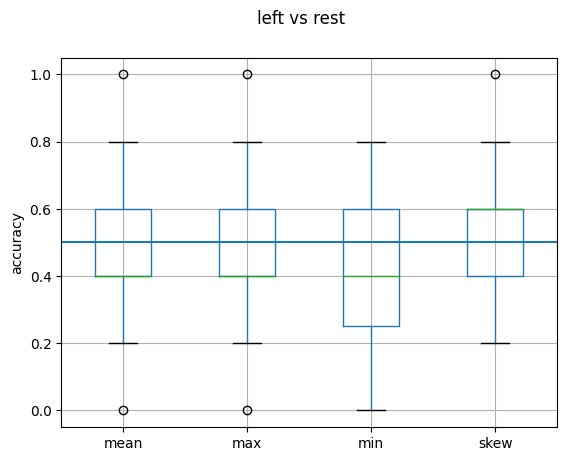

In [20]:
csp_fig, axes = plt.subplots(1)
scores_df.boxplot(ax=axes)
axes.axhline(0.5)
axes.set_ylabel('accuracy')
csp_fig.suptitle('left vs rest')
plt.show()

In [25]:
scores_df.median().to_numpy()

array([0.4, 0.4, 0.4, 0.6])